In [1]:
# %matplotlib notebook
# %matplotlib widget
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [2]:
class Wave:
    frequency = [50, 70, 390, 456]  # Hz
    wave_number = [40, 80, 300, 312]  # 1/m

    def __init__(self, x, t):
        self.x = x
        self.t = t

    def __call__(self, *args, **kwargs):
        w = np.sin(2 * np.pi * self.wave_number[0] * self.x - 2 * np.pi * self.frequency[0] * self.t)
        w += np.cos(2 * np.pi * self.wave_number[1] * self.x - 2 * np.pi * self.frequency[1] * self.t)
        w += np.sin(2 * np.pi * self.wave_number[2] * self.x - 2 * np.pi * self.frequency[2] * self.t)
        w += np.cos(2 * np.pi * self.wave_number[3] * self.x - 2 * np.pi * self.frequency[3] * self.t)
        return w


class Pulse:
    frequency = [1, 10, 15, 20]
    wave_number = [1, 15, 20, 25]
    t_0 = 0
    x_0 = 0

    def __init__(self, x, t):
        self.x = x
        self.t = t

    def __call__(self, *args, **kwargs):
        p = np.exp(-(2 * np.pi * self.wave_number[0] * (self.x - self.x_0) - 2 * np.pi * self.frequency[0] * (
                    self.t - self.t_0)) ** 2)
        w = np.sin(2 * np.pi * self.wave_number[0] * self.x - 2 * np.pi * self.frequency[0] * self.t)
        w += np.cos(2 * np.pi * self.wave_number[1] * self.x - 2 * np.pi * self.frequency[1] * self.t)
        w += np.sin(2 * np.pi * self.wave_number[2] * self.x - 2 * np.pi * self.frequency[2] * self.t)
        w += np.cos(2 * np.pi * self.wave_number[3] * self.x - 2 * np.pi * self.frequency[3] * self.t)
        return p * w

In [3]:
sp = 2 ** 12  # sampling size
t_max = 1  # s
x_max = 1  # m
dt = t_max / sp  # sampling interval (s)
dx = x_max / sp  #sampling interval (m)
sft = sp / t_max  # sampling frequency (sampling points in 1s) t
sfx = sp / x_max  # sampling spatial frequency (sampling points in 1m) x
print('sampling temporal frequency (sampling points in 1s)', sft, 'Hz')
print('sampling spatial frequency (sampling points in 1m)', sfx, '1/m')
x = np.arange(0, x_max, dx)
T = np.arange(0, t_max, dt)
y = np.zeros((len(x), len(T)))
Signal = Pulse
assert sft > 2 * max(Signal.frequency), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the signal'
assert sfx > 2 * max(Signal.wave_number), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the signal'
for i, t in enumerate(T):
    y[:, i] = Signal(x, t)()
print('y.shape', y.shape)

sampling temporal frequency (sampling points in 1s) 4096.0 Hz
sampling spatial frequency (sampling points in 1m) 4096.0 1/m
y.shape (4096, 4096)


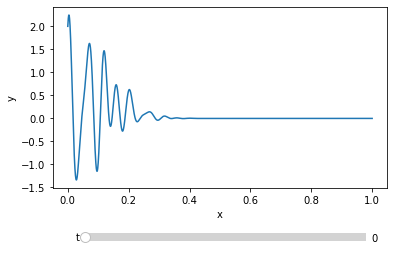

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('x')
ax.set_ylabel('y')
l, = ax.plot(x, y[:, 0])
fig.subplots_adjust(bottom=0.25)
ax_t = plt.axes([0.20, 0.05, 0.65, 0.06])
t_slider = Slider(
    ax=ax_t,
    label='t',
    valmin=0,
    valmax=t_max,
    valinit=0,
    valstep=dt,
)


def val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int(v * sp / t_max) - 1


def update_t(val):
    l.set_ydata(y[:, val_to_idx(val)])
    fig.canvas.draw_idle()


t_slider.on_changed(update_t)
plt.show()

In [5]:
fft_result = np.fft.fft2(y)
abs_fft = np.abs(fft_result)

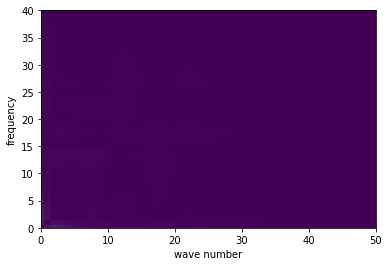

In [6]:
wave_number = np.arange(0, sfx, sfx / sp)
freq = np.arange(0, sft, sft / sp)
# T = sp / sf
# FREQ = n / T
plt.close()
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('wave number')
ax.set_ylabel('frequency')
ax.pcolormesh(wave_number, freq, abs_fft, cmap="viridis")
plt.xlim(0, sfx / 2)
plt.ylim(0, sft / 2)
plt.xlim(0, max(Signal.wave_number) * 2)
plt.ylim(0, max(Signal.frequency) * 2)
plt.show()

In [7]:
ifft_result = np.fft.ifft2(fft_result).real

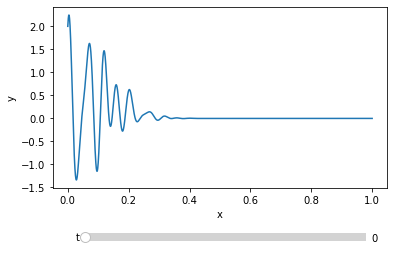

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('x')
ax.set_ylabel('y')
line, = ax.plot(x, ifft_result[:, 0])
fig.subplots_adjust(bottom=0.25)
ax_t = plt.axes([0.20, 0.05, 0.65, 0.06])
t_slider = Slider(
    ax=ax_t,
    label='t',
    valmin=0,
    valmax=t_max,
    valinit=0,
    valstep=dt,
)


def val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int(v * sp / t_max)


def update_t(val):
    line.set_ydata(y[:, val_to_idx(val)])
    fig.canvas.draw_idle()


t_slider.on_changed(update_t)
plt.show()